<a href="https://colab.research.google.com/github/dishankkalra23/Medical-Appointment-No-Shows/blob/main/Medical_Appointment_No_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'replace_this_with_your_kaggle_username'
os.environ['KAGGLE_KEY'] = "replace_this_with_your_kaggle_api_key"
!kaggle datasets download -d joniarroba/noshowappointments
!mkdir -p input/
!sudo unzip -oq /content/noshowappointments.zip -d input
!rm /content/noshowappointments.zip

# Project: [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments)

In this notebook we will be analysing Medical Appointment No show dataset available at Kaggle

>[Project: Medical Appointment No Shows](#scrollTo=BmfbjWRNOPeO)

>[Introduction](#scrollTo=Ty8z814ybwk5)

>[Importing Libraries](#scrollTo=zy3dSfeNPPCc)

>[Downloading dataset](#scrollTo=by5KNcWYVbXS)

>[Loading dataset](#scrollTo=N14ODJZWXEZd)

>[Summary of attributes](#scrollTo=onDkJqoYmhN3)

>[Data Wrangling](#scrollTo=zzG5_tl6_OJF)

>>[Changing Data type](#scrollTo=Av40NiNdoqHt)

>>[Adding new columns](#scrollTo=kislWLDHJly8)

>>[Dropping column](#scrollTo=w6Ew9cf6_ZRT)

>>[Removing Rows](#scrollTo=qNXsjzP1_rzd)

>>[Renaming columns](#scrollTo=HaJI_xlfgW12)

>>[Changing Target Variable](#scrollTo=FHgwFcz7kNr4)

>>[Appointment day before Scheduled Day](#scrollTo=TVfMxC9B8vOC)

>>[Checking Duplicates](#scrollTo=KLgc2zuUrD_9)

>[Exploratory Data Analysis](#scrollTo=rMEMqZ45HXKF)

>>>[Descriptive statistics](#scrollTo=m9SF62eI4sAD)

>[TO DO - Summarizing features using Pie chart for show and no-show description](#scrollTo=_MjjYX1dC-Re)

>>>[Correlation b/w columns of dataset](#scrollTo=67sSwwka4l20)

>>[Gender](#scrollTo=WcgzTUpVHeBB)

>>>[Number of males and females that showed up at appointment](#scrollTo=doajAKAP26Mk)

>>>[Total number of males and females in dataset](#scrollTo=tHoAOmv-3JX0)

>>>[Proportion of male and female patients](#scrollTo=VCkc-mqi3amn)

>>>[Proportion of male and female patients to show up for scheduled appointment](#scrollTo=25FL_9Ak3ixH)

>>>[Converting males and females to quantative variable to find correlation with other features in dataset](#scrollTo=Vvf1k8jF6sFU)

>>>[Function to find relationship b/w gender and different features](#scrollTo=Bo37oz8VR6jn)

>>>[Relation of showing up wrt gender and alcoholism](#scrollTo=7_wdoUDOR3z6)

>>>[Relation of showing up wrt gender and diabetes](#scrollTo=tEShAcy__WCg)

>>>[Relation of showing up wrt gender and hypertension](#scrollTo=Wcqb-5dXJAmG)

>>>[Relation of showing up wrt gender and Handicap](#scrollTo=MdBS29qlcb-l)

>>>>[Converting values in handicap to boolean values(0-non-handicap and 1-handicap)](#scrollTo=triGohxBj6gf)

>>>[Relation of showing up wrt gender and scholarship](#scrollTo=l0wvEBQqjWuy)

>>>[Relation of showing up wrt gender and sms reminder](#scrollTo=vUAnn8KShqH2)

>>[Age](#scrollTo=I_CNHEcq1hLx)

>>>[Oultliers in age column](#scrollTo=Kboa67Hq0E0Q)

>>>[Converting ages column from numerical to categorical](#scrollTo=mpgjV5QsDq7P)

>>[Waiting Days](#scrollTo=sJLu0SWRatit)

>>[Neighbourhood](#scrollTo=dRe7WyNYFttN)

>>>[Top Neighbourhoods with highest appointments](#scrollTo=a6to9l2zrhI7)

>>>[Top Neighbourhoods with lowest appointments](#scrollTo=_Gxr1qwhtm6f)

>>>[Total Appointments and actual show-up appointments](#scrollTo=WY3uzuLgCw7w)

>>>[Neighbourhood where show-up rate is high](#scrollTo=WQD_HHoHMmGy)

>>>[Neighbourhood where show-up rate is low](#scrollTo=EmJdhv9WMv2h)

>>[Day of the week](#scrollTo=mwH-m6BSLNcd)

>>[Relation of showing up wrt month](#scrollTo=EoemVexZp7Fa)

>[Conclusion](#scrollTo=_jWkcJ9e05Fq)

>[Limitations](#scrollTo=6QdaSperKHOb)

>>[References](#scrollTo=-hVJsk9WAQaZ)



# Introduction

The Medical-Appointment-No-Shows dataset includes details of appointments of Brazilian people with the doctor.Data of appointments was combined from more than 45 clinics and hospitals at municipal level in Brazil betweeen 29/4/2016 and 6/6/2016

**Problem** - Many patients book the appointment with doctor then didn't show up on scheduled day. After so many studies happening on this data the average No-Show is 20%. The city has to lose [20 million](https://www.kaggle.com/joniarroba/noshowappointments/discussion/38330#275226) every year due to patients not showing at their scheduled appointment. 

**Objective** of the analysis is to investigate the reason why some patients do not show up to their scheduled appointments. 

# Importing Libraries

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib

# Downloading dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'dishankkalra'
os.environ['KAGGLE_KEY'] = "5abad073757d331a7d75acb03508b92d"
!kaggle datasets download -d joniarroba/noshowappointments

# Dataset will be downloaded in input folder
!mkdir -p input/
!sudo unzip -oq /content/noshowappointments.zip -d input
!rm /content/noshowappointments.zip

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 78.1MB/s]


# Loading dataset

In [ ]:
df = pd.read_csv('/content/input/KaggleV2-May-2016.csv')

In [ ]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
107145,2.358317e+09,5763556,F,2016-06-02T09:06:36Z,2016-06-02T00:00:00Z,19,MONTE BELO,0,0,0,0,0,0,No
93643,2.626314e+12,5742589,F,2016-05-30T08:08:51Z,2016-06-01T00:00:00Z,1,ITARARÉ,0,0,0,0,0,0,Yes
96006,9.566283e+13,5697150,F,2016-05-13T15:03:57Z,2016-06-02T00:00:00Z,50,SANTA CECÍLIA,0,1,0,0,0,1,No
53618,2.957378e+12,5660347,F,2016-05-04T16:11:58Z,2016-05-04T00:00:00Z,12,DA PENHA,0,0,0,0,0,0,No
49531,5.885734e+14,5636815,M,2016-04-28T16:08:53Z,2016-05-16T00:00:00Z,3,GRANDE VITÓRIA,0,0,0,0,0,0,No


# Summary of attributes

A concise summary of a DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset consists of **14 variables** as follows:

**PatientId** : Unique identification of a patient

**AppointmentID** : Unique identification of each appointment

**Gender**: Male or Female

**ScheduledDay**: The date on which appointment was scheduled

**AppointmentDay**: The date on which pateint has to show-up for the appointment

**Age**: How old is the patient

**Neighbourhood**: Place where pateint lives (where pateint comes from to visit the doctor)

**Scholarship**: Whether the patient is enrolled in [Bolsa_Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), which is a social welfare program of the Government of Brazil

**Hipertension**: Hypertension, also known as high blood pressure. Part of patient's medical history.

**Diabetes**: Part of patient's medical history.

**Alcoholism**: Drinking of alcohol that results in significant mental or physical health problems. Part of patient's medical history.

**Handcap**: Handicap, part of patient's medical history.

**SMS_received**: Frequent reminders of scheduled appointment.

**No-show**: Whether the patient attended the appointment or not. 'Yes' means the patient did not attended the appointment

> No missing values in data

> **Data type of columns to be fixed,**
1. PatientId is the unique id for identification of a patient and datatype of PatientId is float that is inappropriate.
2. ScheduledDay and AppointmentDay can be used in analysis if we convert them into date-time format. We can extract the date, day of the week, month and time from the ScheduledDay and AppointmentDay


# Data Wrangling

In this section we will assess our dataset and clean the dataset

## Changing Data type

Changing data type PatientID to pandas datetime 

In [ ]:
df.PatientId = df.PatientId.astype('int')
df.PatientId.dtypes

dtype('int64')

In [ ]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

## Adding new columns
**Adding new columns** -  Scheduled date, Scheduled time and Appointment date, Appointment time, Appointment day of week, Appointment month

**ScheduleDate & AppointmentDate** stores date of Scheduled Day and Appointment Day

**ScheduledTime & AppointmentTime** stores time of Scheduled Day and Appointment Day

**appointment_dow** stores the day of the week of Appointment Day

**appointment_month** stores the month of Appointment




In [ ]:
df['ScheduledTime'] = pd.to_datetime(df.ScheduledDay).dt.time
df['AppointmentTime'] = pd.to_datetime(df.AppointmentDay).dt.time

In [ ]:
df['appointment_dow'] = pd.to_datetime(df.AppointmentDay).dt.day_name()
df['appointment_month'] = pd.to_datetime(df.AppointmentDay).dt.month_name()

In [ ]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [ ]:
df.AppointmentTime.sample(5)

64034     00:00:00
25673     00:00:00
102347    00:00:00
41790     00:00:00
86814     00:00:00
Name: AppointmentTime, dtype: object

In [ ]:
df.AppointmentTime.nunique()

1

> Appointment Time is 00:00:00 in all the rows, it is not relevant to analysis. Hence dropping AppointmentTime column 

## Dropping column

Removing appointment time column from dataset

In [ ]:
df.drop(columns='AppointmentTime',inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledTime', 'appointment_dow', 'appointment_month'],
      dtype='object')

## Removing Rows

Removing records/rows which have age in negative

In [ ]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> Age can never be negative, removing rows which have age less than 0

In [ ]:
df_less_0 = df.query('Age < 0')
df_less_0.Age.count()

1

> Only single row with age less than 0

In [ ]:
df = df.query('Age >= 0')

## Renaming columns

Using [snake case](https://en.wikipedia.org/wiki/Snake_case)(lower case with underscores) where column name should be in lowercase seperated with underscore. In this way we can access the column using period like this df.column_name

In [ ]:
labels = {'PatientId':"patient_id", 'AppointmentID':'appointment_id', 'Gender':'gender', 
        'ScheduledDay':'scheduled_day',
       'AppointmentDay':'appointment_day', 'Age':'age', 'Neighbourhood':'neighbourhood', 
       'Scholarship':'scholarship', 'Hipertension':'hypertension',
       'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 
       'SMS_received':'sms_received', 'No-show':'show',
       'ScheduledTime':'scheduled_time'}
df.rename(columns=labels,inplace=True)

In [ ]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show', 'scheduled_time', 'appointment_dow', 'appointment_month'],
      dtype='object')

## Changing Target Variable 

Changing target variable from no_show(to show) to avoid misconception and easily understand show-up rates

Substituting **Yes with 0** and **No with 1**

In [ ]:
df.show = df.show.map({'Yes':0,'No':1})
df.show.astype(int);

## Appointment day before Scheduled Day

Appointment day i.e the day on which pateint has to visit doctor is before Scheduled Day i.e. the day on which appointment was booked.

In [ ]:
df_error = df[df.scheduled_day > df.appointment_day ][['patient_id','appointment_id','scheduled_day','appointment_day','show']]
df_error

,patient_id,appointment_id,scheduled_day,appointment_day,show
27033,7839272661752,5679978,2016-05-10,2016-05-09,0
55226,7896293967868,5715660,2016-05-18,2016-05-17,0
64175,24252258389979,5664962,2016-05-05,2016-05-04,0
71533,998231581612122,5686628,2016-05-11,2016-05-05,0
72362,3787481966821,5655637,2016-05-04,2016-05-03,0


> In the first row, appointment day is **9th May** and scheduled day is **10th May** which doesn't make any sense. So, dropping rows where appointment day is before scheduled day

In [ ]:
print('Number of rows with appointment day before scheduled day:',df_error.patient_id.count())

Number of rows with appointment day before scheduled day: 5


In [ ]:
print('Number of rows before dropping above rows:', df.patient_id.count())

Number of rows before dropping above rows: 110526


In [ ]:
df = df[df.scheduled_day <= df.appointment_day ]
print('Number of rows after dropping above rows:', df.patient_id.count())

Number of rows after dropping above rows: 110521


## Checking Duplicates

In [ ]:
df.duplicated().sum()

0

> No duplicate rows in data

<a id='eda'></a>
# Exploratory Data Analysis

### Descriptive statistics

Summarizing features and providing quantative summary about the features in dataset

In [ ]:
table = df.groupby('show').mean().iloc[:,3:]
table

,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
show,,,,,,
0,0.115533,0.169042,0.064085,0.030340,0.020212,0.438469
1,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337


In [ ]:
def get_pie_chart(data, title):
  i, j = 0, 0
  fig, ax = plt.subplots(2, 3, figsize=(15, 8))

  for index, value in data.items():
    ax[i, j].pie(x=[value, 1-value], labels=[True, False], 
                 autopct='%1.1f%%', textprops={'fontsize': 14})
    ax[i, j].set_title(index, size=14)
    
    j += 1
    if j == 3:
      j = 0
      i = 1

  fig.suptitle(title, size=20)
  plt.show()

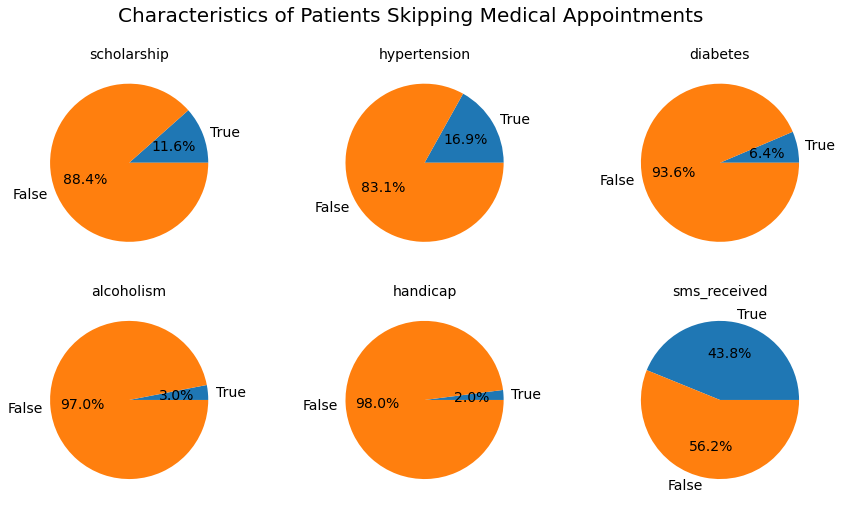

In [ ]:
get_pie_chart(table.loc[0, :], 'Characteristics of Patients Skipping Medical Appointments')

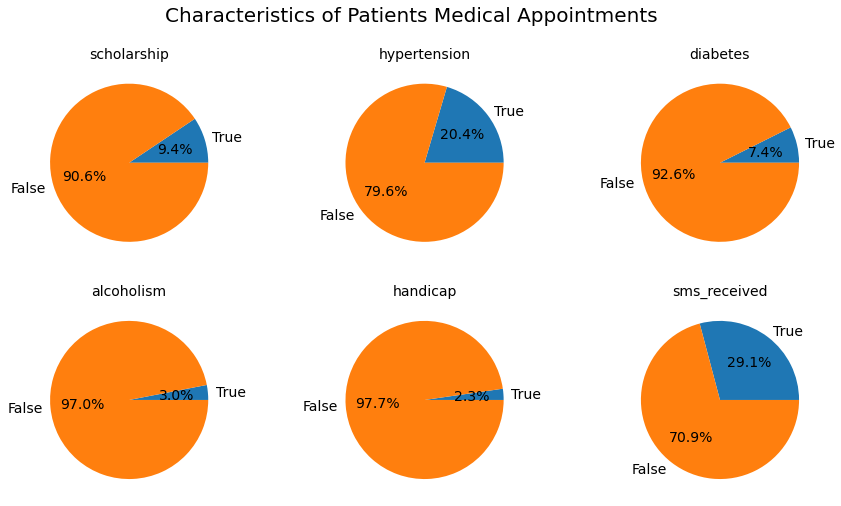

In [ ]:
get_pie_chart(table.loc[1, :], 'Characteristics of Patients Medical Appointments')

> Patients having sholarship i.e 11% patients with scholarship doesn't appeared for the scheduled appointment while people with no scholarship are more towards attending their appointment.

> Patients having hypertension and diabetes i.e 7% and 3% respectively are more likely to show for their appointment because of disease

> It seems like patients consuming alcohol has no effect over no-show

> Patients receiving reminders are more likely to do not show for the appointments. 43% of patients who received the sms reminder regarding upcoming appointment missed the appointment. 

> It seems like failing to remember the appointment is not an issue for no-show 


In [ ]:
val = df.describe().iloc[2:,2:].T.iloc[0,:]
q1 = val[2]
q3 = val[4]
iqr = q3 - q1
val

std     23.109885
min      0.000000
25%     18.000000
50%     37.000000
75%     55.000000
max    115.000000
Name: age, dtype: float64

> Minimum Age - Patient with age zero is representing pregenant womens

> First Quartile(25%) - 25% patients have age b/w 0 and 18 years

> Second Quartile(50%) - 50% patients have age b/w 0 and 37 years

> Third Quartile(75%) - 75% patients have age b/w 0 and 55 years

> Maximim Age - Patient with maximum age is 115 years

> Range is maximum age - minimum age
>>Range = 115 - 0 = 115

> Interquartile Range is Third Quartile - First Quartile
>> Interquartile Range = 55 - 18 = 37

> Median Age is 37 

### Correlation b/w columns of dataset

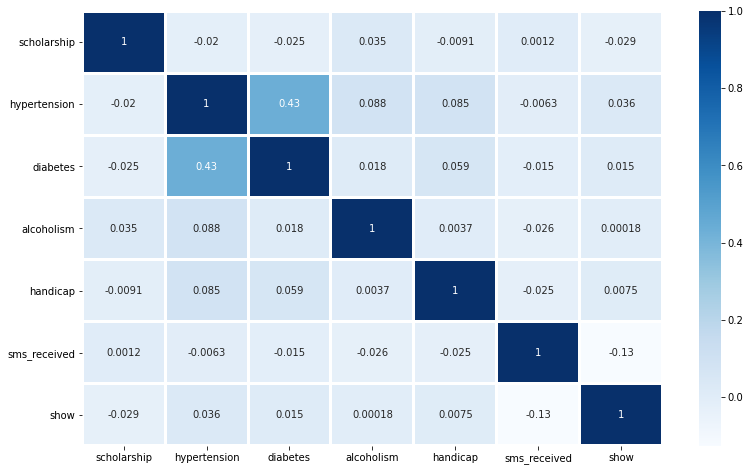

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.heatmap(df.corr().iloc[2:,2:], annot=True, 
            ax=ax, linewidth=2, cmap='Blues')
plt.show()

> There is no strong correlation b/w show-up and other features

> There is positive correlation b/w diabetes and hypertension i.e 0.43 

> Patients getting reminders via sms and show-up rate have negative correlation. It is possible that patients getting reminders regarding appointment are more likely to no-show.

## Gender

Is there any specific gender whose no-show is frequent?



### Number of males and females that showed up at appointment

In [ ]:
gender_show = df.groupby('gender').show.sum()
gender_show

gender
F    57245
M    30962
Name: show, dtype: int64

### Total number of males and females in dataset

In [ ]:
gender_total = df.groupby('gender').patient_id.count()
gender_total

gender
F    71836
M    38685
Name: patient_id, dtype: int64

### Proportion of male and female patients

In [ ]:
prop_female_patients = gender_total.F/(gender_total.F + gender_total.M)*100
prop_female_patients

64.99760226563278

In [ ]:
prop_male_patients = gender_total.M/(gender_total.F + gender_total.M)*100
prop_male_patients

35.00239773436722

In [ ]:
def horizontal_bars(name,prop,title):
  '''
  name: column name
  prop: proportion of male/female show-up 
  title: title of graph
  return: horizontal bar graph
  '''
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop)

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nPercentage of Patients',fontsize=12)
  plt.ylabel('Gender',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

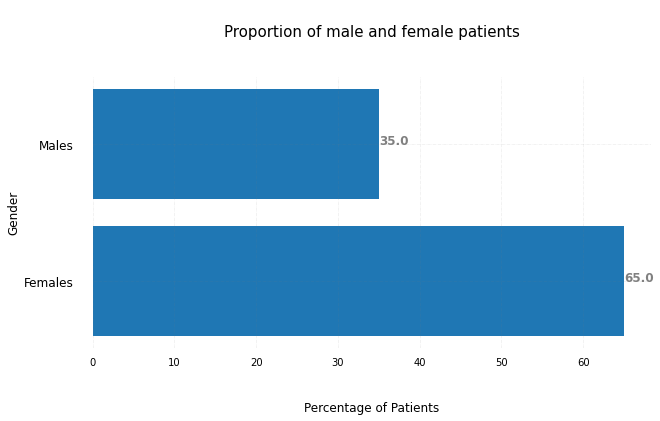

In [ ]:
gend = ['Females','Males']
prop = [prop_female_patients,prop_male_patients]
title = '\nProportion of male and female patients\n\n'
horizontal_bars(gend,prop,title)

> Proportion of males and females patient in the dataset are 35% and 65% respectively. Proportion of females is much more than males in dataset"

### Proportion of male and female patients to show up for scheduled appointment

In [ ]:
prop_female_show = (gender_show.F/gender_total.F)*100
prop_female_show

79.68845704103792

In [ ]:
prop_male_show = (gender_show.M/gender_total.M)*100
prop_male_show

80.0361897376244

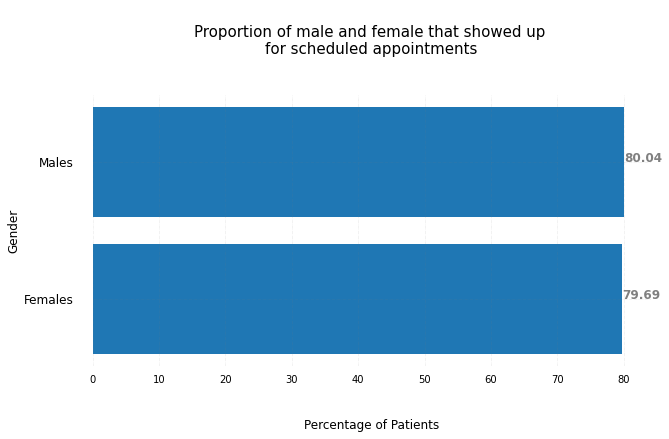

In [ ]:
gend = ['Females','Males']
prop = [prop_female_show,prop_male_show]
title = '\nProportion of male and female that showed up \nfor scheduled appointments\n\n'

horizontal_bars(gend,prop,title)

> Proportion of males and females showing-up for scheduled appointments are almost equal i.e 80%

> Proportion of men and women that do not show are similar

### Converting males and females to quantative variable to find correlation with other features in dataset

In [ ]:
df_new = df.copy()
df_new.gender = df_new.gender.map({'F':1,'M':0})
df_new.corr().iloc[2:,2:]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
gender,1.000000,0.106439,0.114297,0.055721,0.032555,-0.106170,-0.022787,0.046301,-0.004132
age,0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320
scholarship,0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166
hypertension,0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662
diabetes,0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158
alcoholism,-0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181
handicap,-0.022787,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290
sms_received,0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502
show,-0.004132,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000


> There is no direct relation of gender with any other feature 

### Function to find relationship b/w gender and different features

In [ ]:
def rel_with_gender(_feature,_title,legend_title):
  extracted_df = pd.pivot_table(data=df,index=['gender',_feature],values='show')
  extracted_df.show = extracted_df.show*100
  extracted_df.reset_index(inplace=True)

  display(extracted_df)

  # To set figure size 
  plt.figure(figsize=(8,6),dpi=70)
  
  # To make bar plot
  graph = sns.barplot(data=extracted_df,x='gender',y='show',hue=_feature,palette='Paired');
  
  # To add padding b/w axis and ticks
  graph.xaxis.set_tick_params(pad = 10)
  graph.yaxis.set_tick_params(pad = 3)

  graph.set_xlabel('Gender',fontsize=13)
  graph.set_ylabel('% of people who showed up\n',fontsize=13)
  graph.set_title(_title,fontsize=16)
  graph.set_xticklabels(['Females','Males'],fontsize=11.5)

  # To set y-axis limits
  graph.set_ylim(0,90)

  # To place legend outside top right corner of plot
  plt.legend(title=legend_title,bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
  # plt.legend(title='Consume Alcohol',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,labels=['No','Yes'])
  # plt.legend(title='Alcoholism',labels=['A', 'A'], loc='upper left')

  # To remove spines 
  sns.despine( left=True, bottom=True)

  print('\n')
  # TO DO: Add padding between axes and labels
  plt.show(graph)


### Relation of showing up wrt gender and alcoholism 

Is alcohol consumption a factor for no-show?

,gender,alcoholism,show
0,F,0,79.772846
1,F,1,74.816026
2,M,0,79.878516
3,M,1,82.732803


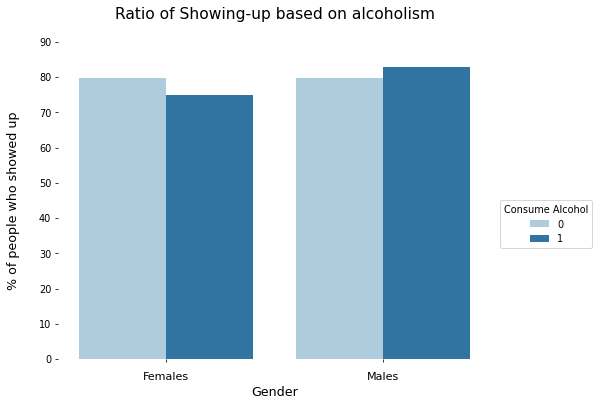

In [ ]:
rel_with_gender(_feature='alcoholism',_title='Ratio of Showing-up based on alcoholism\n',legend_title='Consume Alcohol')

> There is no signifigant relation of showing up with alcoholism wrt gender. 

> There is an increase of 3.6% in show up rate of males who consume alcohol.

> On the other hand there is decrease of 6.2% in show up rate with females who consume alcohol.

>So we can't conclude that alcoholism wrt gender determines showing up for appointment

### Relation of showing up wrt gender and diabetes 

Are diabetic patients more concerned regarding their health and show up in scheduled appointment?

,gender,diabetes,show
0,F,0,79.504756
1,F,1,81.858723
2,M,0,79.888852
3,M,1,82.327771


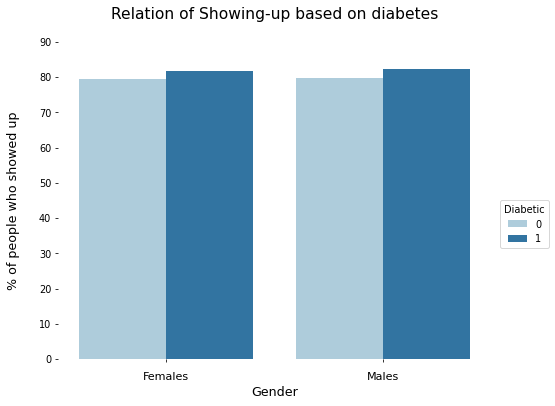

In [ ]:
rel_with_gender(_feature='diabetes',_title='Relation of Showing-up based on diabetes\n',legend_title='Diabetic')

> There is an increase of show-up rate with diabetic males and females. We can say that diabetic patients are more likely to attend the scheduled appointment

### Relation of showing up wrt gender and hypertension

Are patients with hypertension(high blood pressure) more concerned regarding their health and show up in scheduled appointment?

,gender,hypertension,show
0,F,0,78.876755
1,F,1,82.678141
2,M,0,79.492909
3,M,1,82.745280


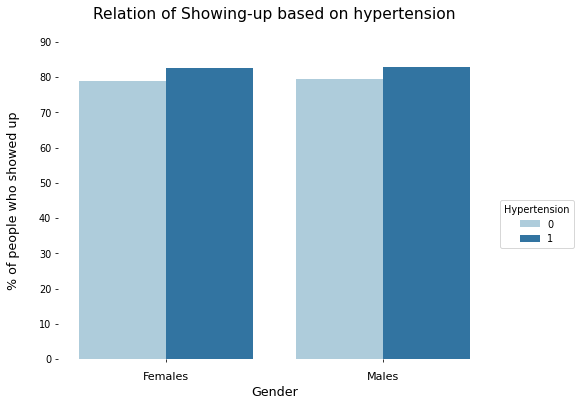

In [ ]:
rel_with_gender(_feature='hypertension',_title='Relation of Showing-up based on hypertension\n',legend_title='Hypertension')

> There is an increase of show-up rate with males and females who have hypertension. We can say that patients with high blood pressure are more concerned towards their health and show-up at scheduled appointment

### Relation of showing up wrt gender and Handicap

Are patients with diabilities show-up at their scheduled appointments?


#### Converting values in handicap to boolean values(0-non-handicap and 1-handicap)

In [ ]:
df.handicap.unique()

array([0, 1, 2, 3, 4])

In [ ]:
df.handicap = df.handicap.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [ ]:
df.handicap.unique()

array([0, 1])

,gender,handicap,show
0,F,0,79.660368
1,F,1,81.225756
2,M,0,79.965549
3,M,1,82.842105


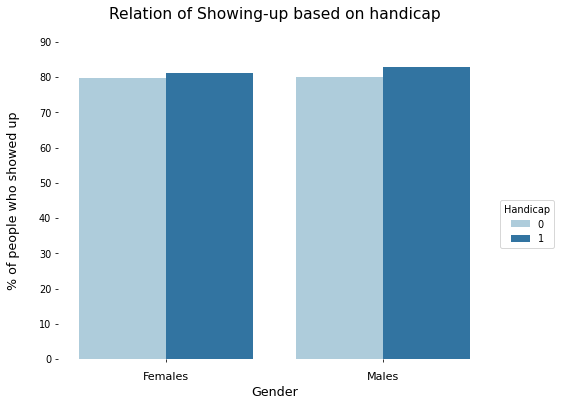

In [ ]:
rel_with_gender(_feature='handicap',_title='Relation of Showing-up based on handicap\n',legend_title='Handicap')

> There is an increase of show-up rate with males and females who have disabilities. We can say patients with disabilities are more concerned towards their health and attend their scheduled appointment

### Relation of showing up wrt gender and scholarship

Are patients with scholarship more tend to show-up?

,gender,scholarship,show
0,F,0,80.177191
1,F,1,76.211454
2,M,0,80.230117
3,M,1,76.494024


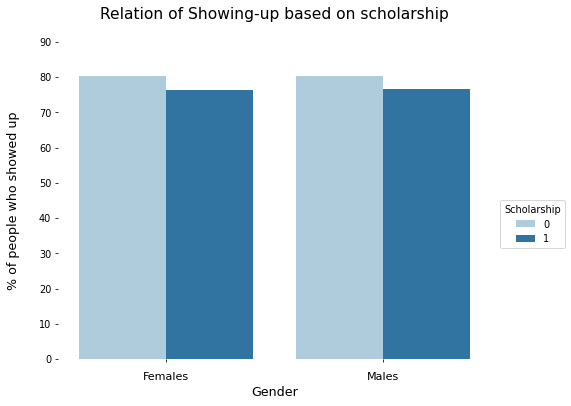

In [ ]:
rel_with_gender(_feature='scholarship',_title='Relation of Showing-up based on scholarship\n',legend_title='Scholarship')

> People with scholarship irrespective of their gender are more tend to not show-up for appointment. People with scholarship doesn't tend to show-up in scheduled appointment which may means that showing-up for appointment is not concerned with high fees that non-scholarshop patient has to pay.

### Relation of showing up wrt gender and sms reminder

Are show-up rate high with patients who get reminder via sms?

,gender,sms_received,show
0,F,0,83.476089
1,F,1,72.233700
2,M,0,82.999453
3,M,1,72.836879


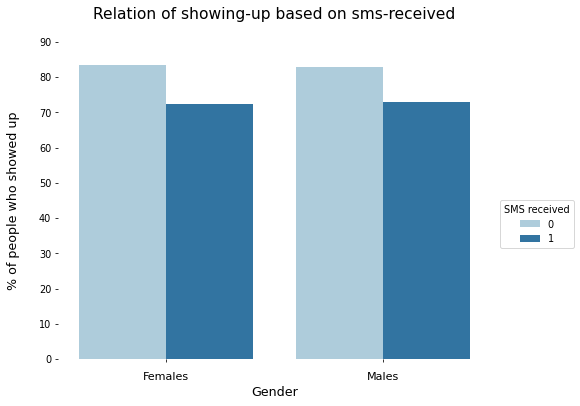

In [ ]:
rel_with_gender('sms_received','Relation of showing-up based on sms-received\n','SMS received')

> It is evident from above graph people who got sms reminders irrespective of their gender were the ones with less show-up rate. Our above asumption in descriptive statistics is correct i.e. failing to remember the appointment is not an issue for no-show. 

## Age 
How people of different age group are showing-up for the appointments? Is there any specific age group that determine showing to the appointment?

### Oultliers in age column

In [ ]:
df.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

>Condition for a data point value to be outlier

>>data point value) < left bound

>>(data point value) > right bound

>where left bound = Q1 – 1.5 * IQR and right bound = Q3 + 1.5 * IQR





In [ ]:
left_bound = q1 - (1.5 * iqr)
right_bound = q3 + (1.5 * iqr)
print('Left bound:',left_bound)
print('Right bound:',right_bound)

Left bound: -37.5
Right bound: 110.5


In [ ]:
# Age can never be negative so changing left bound to 0
left_bound = 0
count = 0 # counting number of outliers
value = [] # value of outliers
for outlier in df.age:
  if outlier < left_bound or outlier > right_bound:
    count += 1
    value.append(outlier)
print('Number of outliers:',count)
print('Values of outliers:',value)

Number of outliers: 5
Values of outliers: [115, 115, 115, 115, 115]


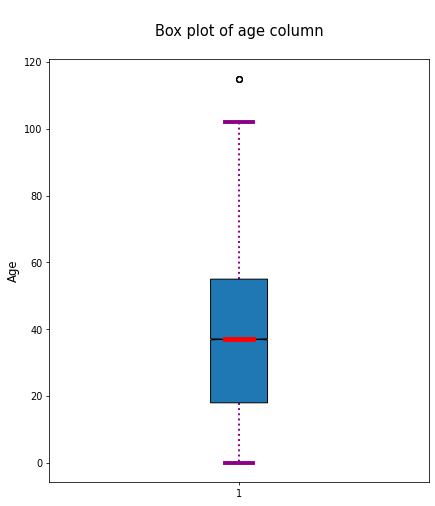

In [ ]:
data = df.age
plt.figure(figsize=(7,8),dpi=70)
bp = plt.boxplot(data,patch_artist = True,notch ='True');

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 2,
                linestyle =":")
    
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 4)
    
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 5)
    
plt.ylabel("Age",size=12)
plt.title("\nBox plot of age column\n",size=15);

> An outlier is defined as a data point that is located outside the whiskers of the box plot.Their is outlier at 115 and right bound is 110.

In [ ]:
def ranges(feature,bins_edges,bins_names):
  arr = df[feature]
  df[feature] = pd.cut(x=arr,bins=bins_edges,labels=bins_names)

In [ ]:
def create_bar_plot(_feature,_title,x_label):
  extracted_df = pd.pivot_table(data=df,index=_feature,values='show')
  extracted_df.show = extracted_df.show*100
  extracted_df.reset_index(inplace=True)

  display(extracted_df)

  # To set figure size 
  plt.figure(figsize=(8,6),dpi=70)
  
  # To make bar plot
  graph = sns.barplot(data=extracted_df,x=_feature,y='show',palette="crest");

  # To add padding b/w axis and ticks
  graph.xaxis.set_tick_params(pad = 9)
  graph.yaxis.set_tick_params(pad = 3)
  graph.tick_params(bottom=False)

  if _feature == 'waiting_days':
    plt.xticks(rotation=45)

  graph.set_xlabel(x_label,fontsize=13)
  graph.set_ylabel('% of people who showed up\n',fontsize=13)
  graph.set_title(_title,fontsize=16)

  # To set y-axis limits
  graph.set_ylim(0,90)

  # To remove spines 
  sns.despine( left=True, bottom=True)

  print('\n')
  # TO DO: Add padding between axes and labels
  plt.show(graph)


### Converting ages column from numerical to categorical 

Ranges on the basis of standard deviation i.e. 23

Children(0-22),Youth(23-45),Adult(46-68),Senior(69-111)


,age,show
0,Children,76.901764
1,Youth,77.833974
2,Adult,83.215262
3,Senior,84.415025


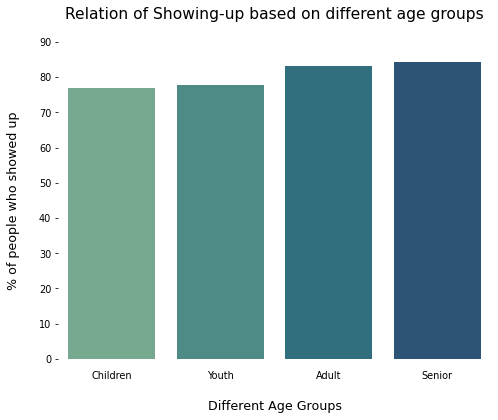

In [ ]:
feature = 'age'
bins_edges = [0,23,46,69,111]
bins_names = ['Children','Youth','Adult','Senior']
print('Children(0-22),Youth(23-45),Adult(46-68),Senior(69-111)')
ranges(feature,bins_edges,bins_names)
create_bar_plot(_feature=feature,_title='Relation of Showing-up based on different age groups\n',x_label='\nDifferent Age Groups')

> Showing rate for appointment is more in older people than young people maybe because people are more concerned for their health in old age than than in younger age

## Waiting Days

Is longer waiting days between appointment day and scheduled day is the reason for no-show?

In [ ]:
df['waiting_days'] = df.appointment_day - df.scheduled_day

In [ ]:
df.waiting_days.dtypes

dtype('<m8[ns]')

In [ ]:
df.waiting_days = df.waiting_days.astype('str')
df.waiting_days = df.waiting_days.apply(lambda x: x.split()[0])
df.waiting_days = df.waiting_days.astype('int')

In [ ]:
df.waiting_days.dtypes

dtype('int64')

In [ ]:
df.waiting_days.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

Note: Here waiting days are delay in days of appointment and scheduled day


,waiting_days,show
0,0-15,83.516728
1,16-30,67.327312
2,31-45,65.317434
3,46-60,67.912946
4,61-75,70.997846
5,76-90,71.182266
6,91-115,78.873239
7,116-130,91.666667
8,131-145,54.545455
9,146-160,36.363636


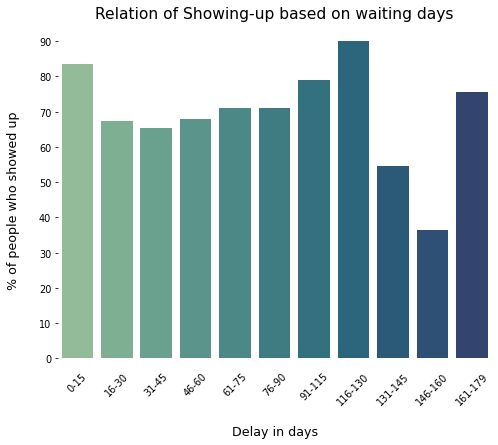

In [ ]:
print('Note: Here waiting days are delay in days of appointment and scheduled day')
feature = 'waiting_days'
bins_edges = [-1,16,31,46,61,76,91,116,131,146,161,180]
bins_names = ['0-15','16-30','31-45','46-60','61-75','76-90','91-115','116-130','131-145','146-160','161-179']
ranges(feature,bins_edges,bins_names)
create_bar_plot(_feature=feature,_title='Relation of Showing-up based on waiting days\n',x_label='\nDelay in days')

>There is no direct relation of No-Show with waiting days

## Neighbourhood
Is their neighbourhoods where no-show is frequent? Neighbourhoods are places where the patients comes from to visit the doctor. 

In [ ]:
neighbour_df = pd.DataFrame()

In [ ]:
neighbour_df['total_appointments'] = df.groupby(by='neighbourhood').show.count()
neighbour_df['show_appointments'] = df.groupby(by='neighbourhood').show.sum()
neighbour_df['show_prop'] = df.groupby(by='neighbourhood').show.mean()
neighbour_df.reset_index(inplace=True)

In [ ]:
neighbour_df.sample(10)

,neighbourhood,total_appointments,show_appointments,show_prop
44,MARUÍPE,1902,1478,0.777077
25,GOIABEIRAS,700,563,0.804286
8,BONFIM,2773,2223,0.801659
3,ARIOVALDO FAVALESSA,282,220,0.780142
39,JARDIM DA PENHA,3877,3246,0.837245
51,PARQUE INDUSTRIAL,1,1,1.000000
2,ANTÔNIO HONÓRIO,271,221,0.815498
53,PIEDADE,452,364,0.805310
1,ANDORINHAS,2262,1741,0.769673
0,AEROPORTO,8,7,0.875000


### Top Neighbourhoods with highest appointments 

In [ ]:
high_appointment_neigh = neighbour_df.sort_values('total_appointments',ascending=False).head(10)
high_appointment_neigh

,neighbourhood,total_appointments,show_appointments,show_prop
38,JARDIM CAMBURI,7717,6252,0.810159
43,MARIA ORTIZ,5805,4586,0.790009
59,RESISTÊNCIA,4430,3525,0.795711
39,JARDIM DA PENHA,3877,3246,0.837245
36,ITARARÉ,3514,2591,0.737336
10,CENTRO,3334,2631,0.789142
78,TABUAZEIRO,3131,2559,0.817311
66,SANTA MARTHA,3131,2635,0.841584
40,JESUS DE NAZARETH,2853,2157,0.756046
8,BONFIM,2773,2223,0.801659


In [ ]:
def color_squarify(data_frame):
  cmap = matplotlib.cm.tab20c
  mini=min(data_frame.total_appointments)
  maxi=max(data_frame.total_appointments)
  norm = matplotlib.colors.Normalize(mini,maxi)
  colors = [cmap(norm(value)) for value in data_frame.total_appointments]
  return colors

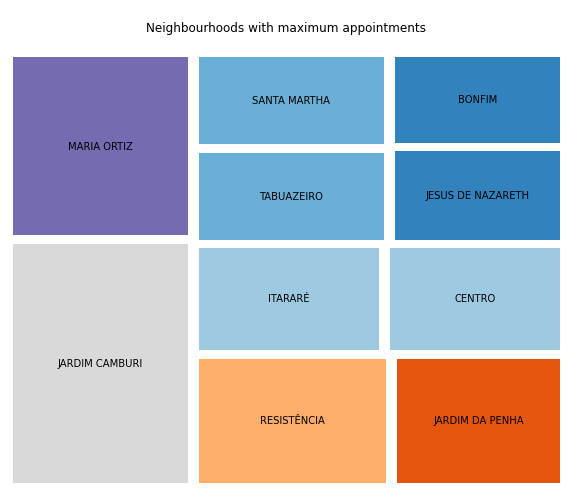

In [ ]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=high_appointment_neigh.total_appointments,
              label=high_appointment_neigh.neighbourhood,
              color = color_squarify(high_appointment_neigh),
              pad=True)
plt.axis('off')
plt.title('\nNeighbourhoods with maximum appointments\n')
plt.show()

> From JARDIM CAMBURI there were highest appointments i.e. 7717

### Top Neighbourhoods with lowest appointments

In [ ]:
low_appointment_neigh = neighbour_df.sort_values('total_appointments').head(5)

In [ ]:
low_appointment_neigh.neighbourhood.iloc[0] = 'PQ'
low_appointment_neigh.neighbourhood.iloc[1] = 'IOCDT'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
low_appointment_neigh

,neighbourhood,total_appointments,show_appointments,show_prop
51,PQ,1,1,1.000000
34,IOCDT,2,0,0.000000
0,AEROPORTO,8,7,0.875000
32,ILHA DO FRADE,10,8,0.800000
31,ILHA DO BOI,35,32,0.914286


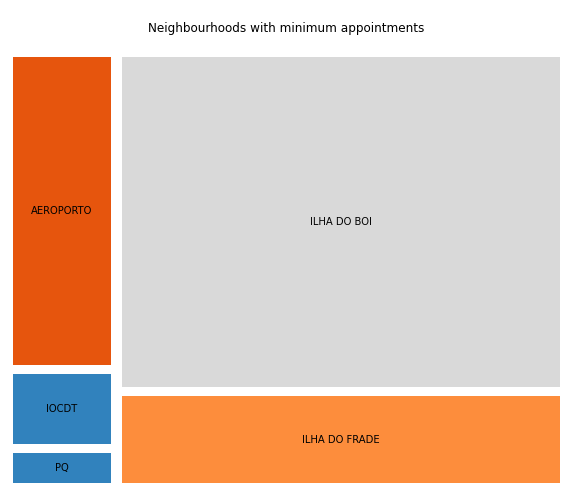

In [ ]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=low_appointment_neigh.total_appointments,
              label=low_appointment_neigh.neighbourhood,
              color = color_squarify(low_appointment_neigh),
              pad=True)
plt.axis('off')
plt.title('\nNeighbourhoods with minimum appointments\n')
plt.show()

> From Parque Industrial(PQ) there were only one appointment

### Total Appointments and actual show-up appointments

In [ ]:
neighbour_df.sort_values('total_appointments', ascending=False).head(n=10)

,neighbourhood,total_appointments,show_appointments,show_prop
38,JARDIM CAMBURI,7717,6252,0.810159
43,MARIA ORTIZ,5805,4586,0.790009
59,RESISTÊNCIA,4430,3525,0.795711
39,JARDIM DA PENHA,3877,3246,0.837245
36,ITARARÉ,3514,2591,0.737336
10,CENTRO,3334,2631,0.789142
78,TABUAZEIRO,3131,2559,0.817311
66,SANTA MARTHA,3131,2635,0.841584
40,JESUS DE NAZARETH,2853,2157,0.756046
8,BONFIM,2773,2223,0.801659


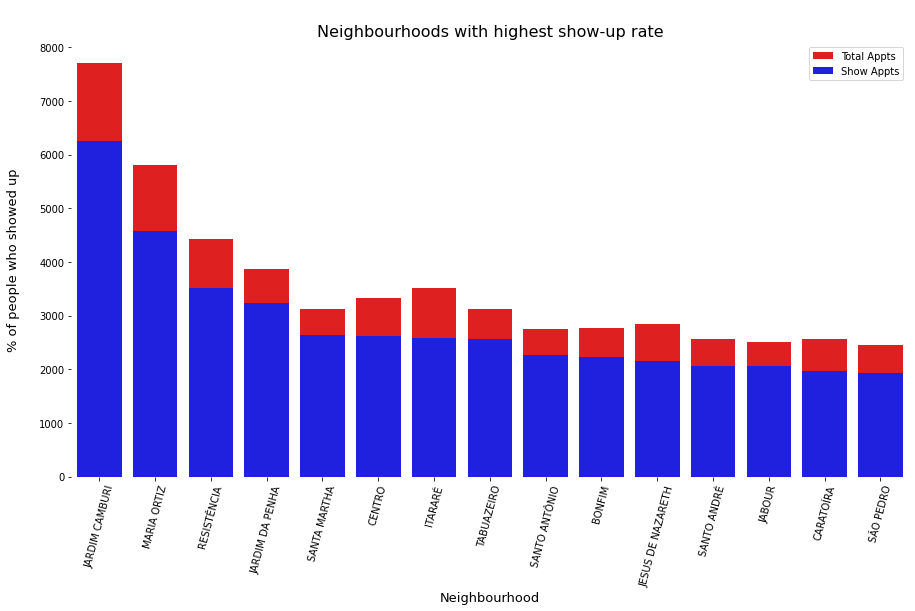

In [125]:
plt.figure(figsize=(15, 8))
graph1 = sns.barplot(data=neighbour_df.sort_values('show_appointments', ascending=False).head(n=15),
                     x='neighbourhood',y='total_appointments', color='red', label='Total Appts')

graph2 = sns.barplot(data=neighbour_df.sort_values('show_appointments', ascending=False).head(n=15),
                     x='neighbourhood',y='show_appointments',color='blue', label='Show Appts')

graph1.set_xlabel('Neighbourhood',fontsize=13)
graph1.set_ylabel('% of people who showed up\n',fontsize=13)
graph1.set_title('\nNeighbourhoods with highest show-up rate',fontsize=16)

sns.despine(left=True, bottom=True)
plt.xticks(rotation=75)
plt.legend()
plt.show()

### Neighbourhood where show-up rate is high

In [ ]:
neigh_high_show = neighbour_df.nlargest(n=8,columns='show_prop')
neigh_high_show.show_prop = neigh_high_show.show_prop*100
neigh_high_show

,neighbourhood,total_appointments,show_appointments,show_prop
51,PARQUE INDUSTRIAL,1,1,100.000000
31,ILHA DO BOI,35,32,91.428571
0,AEROPORTO,8,7,87.500000
48,MÁRIO CYPRESTE,371,317,85.444744
73,SOLON BORGES,469,400,85.287846
16,DE LOURDES,305,258,84.590164
17,DO CABRAL,560,472,84.285714
66,SANTA MARTHA,3131,2635,84.158416


> Removing first 3 rows beacuse total appointments are very less from other neighbourhoods so concluding high show up rate in first three nighbourhood will be inappropriate

> Show-up rate of other neighbourhoods are approximately equal to 85%

### Neighbourhood where show-up rate is low

In [ ]:
neigh_low_show = neighbour_df.nsmallest(n=6,columns='show_prop')
neigh_low_show.show_prop = neigh_low_show.show_prop*100
neigh_low_show

,neighbourhood,total_appointments,show_appointments,show_prop
34,ILHAS OCEÂNICAS DE TRINDADE,2,0,0.000000
70,SANTOS DUMONT,1276,907,71.081505
61,SANTA CECÍLIA,448,325,72.544643
62,SANTA CLARA,506,372,73.517787
36,ITARARÉ,3514,2591,73.733637
40,JESUS DE NAZARETH,2853,2157,75.604627


> ILHAS OCEÂNICAS DE TRINDADE has only two appointments that is very less than other neighbourhoods so concluding low show-up rate of ILHAS OCEÂNICAS DE TRINDADE on the basis of only 2 appointments will be inappropriate

> Lowest show rate is 71% at SANTOS DUMONT  

> We can say that neighbourhoods of MÁRIO CYPRESTE and SOLON BORGES are more likely to attend their scheduled appointment	

## Day of the week
Is there any specific day of week where appointment rate is low?

In [ ]:
appointment_day_of_week = pd.DataFrame()

In [ ]:
appointment_day_of_week['total_dow'] = df.groupby('appointment_dow').show.count()
appointment_day_of_week['show_dow'] = df.groupby('appointment_dow').show.sum()
appointment_day_of_week['show_prop'] = df.groupby('appointment_dow').show.mean()
appointment_day_of_week.reset_index(inplace=True)

In [ ]:
appointment_day_of_week

,appointment_dow,total_dow,show_dow,show_prop
0,Friday,19019,14982,0.787739
1,Monday,22713,18024,0.793554
2,Saturday,39,30,0.769231
3,Thursday,17246,13909,0.806506
4,Tuesday,25638,20488,0.799126
5,Wednesday,25866,20774,0.803139


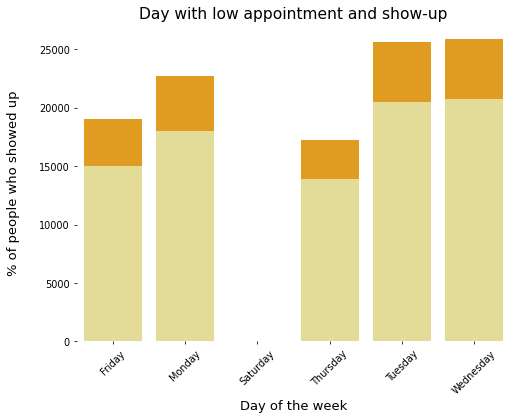

In [ ]:
plt.figure(figsize=(8,6),dpi=70)
graph = sns.barplot(data=appointment_day_of_week,x='appointment_dow',y='total_dow',color='orange')
graph = sns.barplot(data=appointment_day_of_week,x='appointment_dow',y='show_dow',color='khaki')
graph.set_xlabel('Day of the week',fontsize=13.5)
graph.set_ylabel('% of people who showed up\n',fontsize=13.5)
graph.set_title('Day with low appointment and show-up',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=45);

> Saturday's have lowest number of appointments maybe due to weekend. People prefer to schedule appointments at weekdays 

In [ ]:
appointment_day_of_week['no_show_prop'] = 1 - appointment_day_of_week['show_prop']

In [ ]:
appointment_day_of_week

,appointment_dow,total_dow,show_dow,show_prop,no_show_prop
0,Friday,19019,14982,0.787739,0.212261
1,Monday,22713,18024,0.793554,0.206446
2,Saturday,39,30,0.769231,0.230769
3,Thursday,17246,13909,0.806506,0.193494
4,Tuesday,25638,20488,0.799126,0.200874
5,Wednesday,25866,20774,0.803139,0.196861


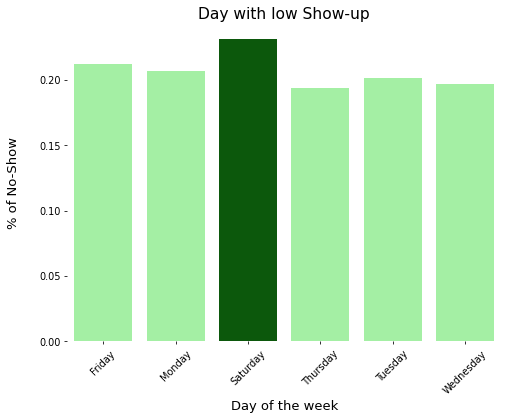

In [ ]:
plt.figure(figsize=(8,6),dpi=70)
values = appointment_day_of_week.no_show_prop
clrs = ['palegreen' if (x < max(values)) else 'darkgreen' for x in values ]
graph = sns.barplot(data=appointment_day_of_week,x='appointment_dow',y='no_show_prop',palette=clrs)
graph.set_xlabel('Day of the week',fontsize=13.5)
graph.set_ylabel('% of No-Show\n',fontsize=13.5)
graph.set_title('Day with low Show-up',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=45);

> Saturday have slightly higher no-show rate in comparison to other days.We can't conclude appointments on Saturdays will be more likely to be not shown due to less number of appointments

## Relation of showing up wrt month

Is there any speciifc month where show-up rate is high?

In [ ]:
months = df.appointment_month.unique()
print(months)

['April' 'May' 'June']


In [ ]:
appointment_month = pd.DataFrame()

In [ ]:
appointment_month['total_appointments'] = df.groupby('appointment_month').show.count()
appointment_month['show_appointments'] = df.groupby('appointment_month').show.sum()
appointment_month['show_prop'] = df.groupby('appointment_month').show.mean()
appointment_month.reset_index(inplace=True)
appointment_month.show_prop = appointment_month.show_prop*100;

In [ ]:
appointment_month

,appointment_month,total_appointments,show_appointments,show_prop
0,April,3235,2602,80.432767
1,June,26450,21568,81.542533
2,May,80836,64037,79.218418


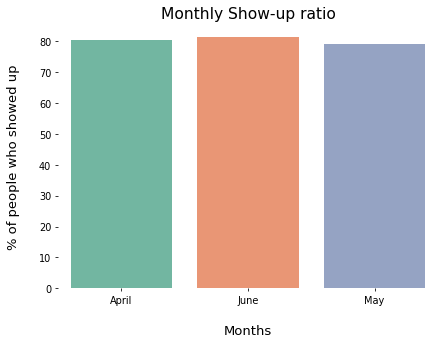

In [ ]:
plt.figure(figsize=(7,5),dpi=70)
graph = sns.barplot(data=appointment_month,x='appointment_month',y='show_prop',palette='Set2')
graph.set_xlabel('\nMonths',fontsize=13.5)
graph.set_ylabel('% of people who showed up\n',fontsize=13.5)
graph.set_title('Monthly Show-up ratio',fontsize=16)
sns.despine( left=True, bottom=True)

> Show up rates in month of May is slightly lower than month of April and June

> We can notice that number of appointments in month of May is almost three times from June and 26 times from April. 

> We can't conclude that any specific month has highest no-show rate  

# Conclusion

* Important features to determine no-show are age, hypertension, neighbourhood, scholarship and diabetes.

* Showing rate for appointment is more at older age group than younger age group maybe because people are more concerned for their health in old age than than in younger age.

* Hypertension is an important characterstic of patients with higher attendance frequency

* Showing rate for men and women are similar  

* Their is no relation of showing up wrt alcholism and handicaps

* Enrolment in Bolsa Familia program or scholarhip is an important feature to determine patients with higher attendance frequency

* There is no preference for specific weekday over the other when it comes to attendance frequency.

* There is no direct relation of No-Show with shorter or longer waiting days between appointment and schedule day.



## Improvement opportunities at administration level 

* Their were no appointments at sundays and appointments at saturday's were signifigantly low in comparison to weekdays. Administration should spread the appointments across months and weekdays regardless of weekends.

* Administration should avoid scheduling multiple appointments in the same day for a single patient unless their is emergency. Giving everyone a chance to get second appointment after missing first appointment gives patient a relief of anyway getting another appointment.

* Administration should charge a part of fees in advance while patient is scheduling appointment. This may reduce no-show rate.

* Administration should follow a systematic approach when sending reminders to patients while closely monitoring the associated costs of sending follow-up reminders 

# Limitations

* Appointment Time in all the rows is same that is 00:00:00.

* If appointment time was specified properly then we could have 
find time intervals over which people prefer to miss scheduled appointment

* Handicap section has five different values(0,1,2,3,4) but on Kaggle author describes it as column with boolean values where 0 represents person with no-handicap and 1 with handicap.
* We have assumed that 1,2,3,4 are handicaps and changed them all to 1 to represent person with handicap. While 0 represents person with no handicap.

* Distance from neighbourhood to the hospital is not given which may prove to be very effective in determining neighbourhoods which are far away from hospital  

* Dataset only have data for month **April, May and June**. 
* If data for other months was provided then we could have find months with least show-up rates.